In [10]:
from keras.datasets import mnist

2023-03-16 00:48:34.341518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
import matplotlib.pyplot as plt

In [11]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

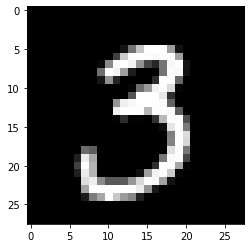

In [19]:
plt.imshow(x_test[90],cmap="gray")

In [20]:
y_test[90]

3

In [24]:
x=x_test.reshape(-1,28*28) # flatten
y=y_test

In [25]:
x.shape

(10000, 784)

####  step 1. preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
x_=sc.fit_transform(x)

In [32]:
x_.shape

(10000, 784)

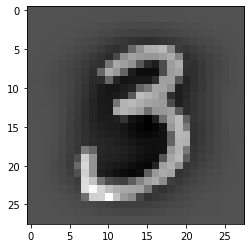

In [33]:
plt.imshow(x_[90].reshape(28,28),cmap="gray")

###  sklearn PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca=PCA(n_components=2)
# converting 784 to 2

In [36]:
z_pca=pca.fit_transform(x_)
# (m,784)  to (m,2)

In [37]:
z_pca.shape

(10000, 2)

In [40]:
z_pca

array([[-5.458283  ,  6.41301553],
       [ 2.80446824, -8.03309072],
       [-7.41123869, -3.86417063],
       ...,
       [-5.00437504,  1.15438726],
       [-1.42088098, -4.42307331],
       [13.1427727 , -4.26495643]])

In [41]:
pca.explained_variance_  
# total variance 41+28 = 70 original=100 therefore lost 30 percent of data in converting to 2d

array([41.39893397, 28.35105708])

### custom PCA

In [42]:
import numpy as np

####  step2 . compute covariance matrix

In [43]:
## use the formula  or use the trick x_.T dot x_

covar=np.dot(x_.T,x_)


In [44]:
covar.shape

(784, 784)

####  step 3. compute eigen vectors using svd

In [45]:
from numpy.linalg import svd

In [47]:
u,s,v=svd(covar)

In [49]:
u.shape

(784, 784)

In [50]:
u_red=u[:,:2]

In [51]:
u_red.shape

(784, 2)

####  step 4. project data on new axis(components)

In [55]:
z=np.dot(x_,u_red)

In [56]:
z.shape

(10000, 2)

In [57]:
z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

##  visualize

In [58]:
import pandas as pd

In [60]:
newdataset=np.hstack((z,y.reshape(-1,1)))

In [61]:
dataframe=pd.DataFrame(newdataset,columns=["pc1","pc2","label"])

In [63]:
dataframe.head()

,pc1,pc2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

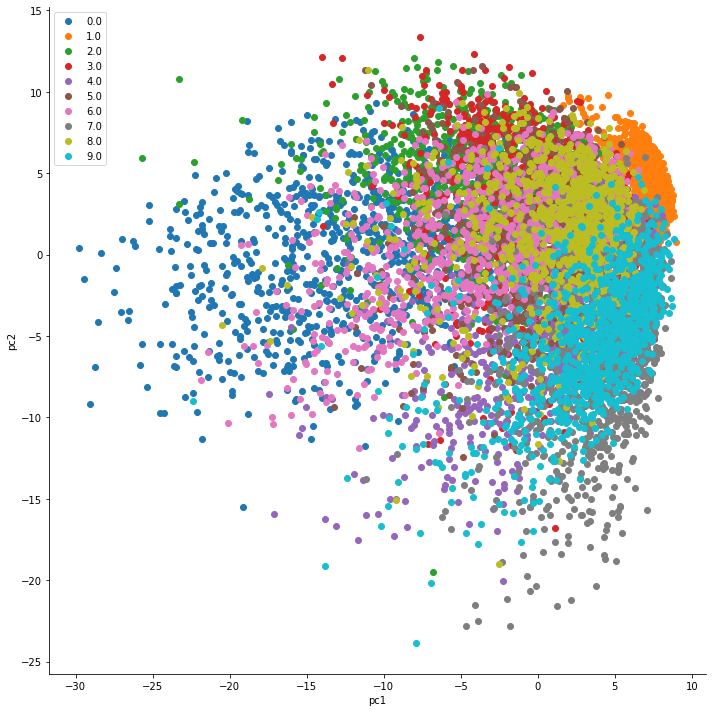

In [68]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(dataframe,hue="label",height=10)
fg.map(plt.scatter,"pc1","pc2")
plt.legend()
plt.show()

###  PCA with 784

In [69]:
pca=PCA()
# not specified how many dimension therfore automatic 784

In [70]:
z_pca=pca.fit_transform(x_)


In [71]:
z_pca.shape

(10000, 784)

In [72]:
pca.explained_variance_
#  goind down it is decreasing  means it is explaining data very less

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [75]:
# cumulative sum
cum_var_explained=np.cumsum(pca.explained_variance_ratio_)

In [76]:
cum_var_explained
# in array arr[0] if explain 6 percent , arr[1] 10 percent....  for good algo we need to go till 
# explaining 90 percent therefore we need that number of features to that 90% achived

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

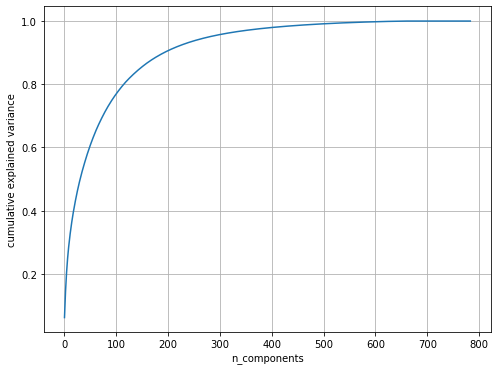

In [81]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cumulative explained variance")
plt.show()

In [82]:
# therefore by this graph we can see at components 300 we can still explained more that 90 % of 
# data , therfore we can reduce out 784d to 300d and save space and cost
